In [143]:
import numpy as np
import pandas as pd

In [144]:
Kerala = pd.read_csv("A:\\Projects\\Flood Prediction Model\\Datasets\\kerala.csv",sep=",")

In [145]:
Kerala.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,ANNUAL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,73.4,386.3,2122.8,666.1,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,9.3,275.7,2403.3,638.2,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,21.8,336.4,2343.1,570.1,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,26.7,339.4,2398.2,365.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,23.5,378.6,1881.5,458.1,2741.6,0


In [146]:
Kerala.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
 ANNUAL        0
FLOODS         0
dtype: int64

In [147]:
#separating data to be used for prediction
X = Kerala.iloc[:,1:14]
X.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [148]:
#separating flood label from the data set
y = Kerala.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

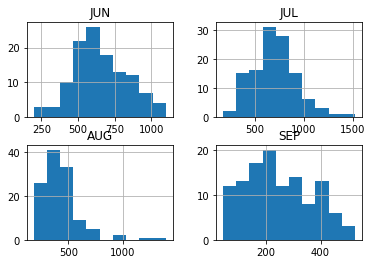

In [149]:
#rainfall values during the monsoon
import matplotlib.pyplot as plt
c = Kerala[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [150]:
#scaling data between 0 and 1 as its widely distributed
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [151]:
#dividing data into training and test sets (test data = 20%)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [152]:
X_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
5,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0
62,1963,30.2,24.8,69.8,96.3,157.1,393.3,720.2,511.0,223.9,282.6,93.4,48.4
95,1996,2.8,9.1,14.4,124.3,74.3,572.4,696.0,327.4,342.7,294.1,89.9,62.5
93,1994,24.3,27.1,18.1,154.5,141.3,845.0,955.5,479.9,212.6,428.4,117.6,6.5
45,1946,1.8,5.4,108.4,139.8,83.0,919.0,671.7,695.6,199.4,266.1,273.0,202.3


In [153]:
y_train.head()

5     0
62    0
95    0
93    1
45    1
Name: FLOODS, dtype: int64

## THE 5 CLASSIFIERS

### 1. KNN Classifier

In [154]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(X_train,y_train)

In [155]:
#predicting chances of flood occurrence using test data
y_predict = knn_clf.predict(X_test)
print("Predicted chances of flood occurrences (by year):")
print(y_predict)

Predicted chances of flood occurrences (by year):
[1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1]


In [156]:
#actual values of flood occurrences
print("Actual values of flood occurrences (by year):")
print(y_test)

Actual values of flood occurrences (by year):
15     1
20     0
117    1
35     1
53     1
43     0
51     0
64     0
78     0
56     1
114    0
101    0
90     1
110    1
23     1
67     1
116    0
99     0
2      1
77     1
60     1
3      1
26     1
38     1
Name: FLOODS, dtype: int64


In [157]:
#knn accuracy score
from sklearn.model_selection import cross_val_score
knn_accuracy = cross_val_score(knn_clf, X_test, y_test, cv=3, scoring='accuracy', n_jobs=-1)
knn_accuracy.mean()

0.8333333333333334

In [158]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

print("\nAccuracy score: %f"%(accuracy_score(y_test, y_predict)))
print("Recall score: %f"%(recall_score(y_test, y_predict)))
print("ROC score: %f"%(roc_auc_score(y_test, y_predict)))


Accuracy score: 0.958333
Recall score: 0.933333
ROC score: 0.966667


### 2. Logistic Regression

In [159]:
X_train_std = minmax.fit_transform(X_train)
X_test_std = minmax.transform(X_test)

In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(X_train_std, y_train)

lr_accuracy = cross_val_score(lr_clf, X_test_std, y_test, cv=3, scoring='accuracy', n_jobs=-1)

In [161]:
lr_accuracy.mean()

0.75

In [162]:
y_predict = lr_clf.predict(X_test_std)
print("Predicted chances of flood occurrences (by year):")
print(y_predict)

Predicted chances of flood occurrences (by year):
[1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1]


In [163]:
print("Actual values of flood occurrences (by year):")
print(y_test.values)

Actual values of flood occurrences (by year):
[1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1]


In [164]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

print("\nAccuracy score: %f"%(accuracy_score(y_test, y_predict)))
print("Recall score: %f"%(recall_score(y_test, y_predict)))
print("ROC score: %f"%(roc_auc_score(y_test, y_predict)))


Accuracy score: 0.875000
Recall score: 0.800000
ROC score: 0.900000


### 3. Decision Tree Classification

In [165]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train, y_train)
dtc_clf_acc = cross_val_score(dtc_clf, X_train_std, y_train, cv=3, scoring="accuracy", n_jobs=-1)
dtc_clf_acc

array([0.6875    , 0.51612903, 0.51612903])

In [166]:
print("Predicted chances of flood occurrences (by year):")
y_pred = dtc_clf.predict(X_test)
print(y_pred)

Predicted chances of flood occurrences (by year):
[0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1]


In [167]:
print("Actual values of flood occurrences (by year):")
print(y_test.values)

Actual values of flood occurrences (by year):
[1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1]


In [168]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

print("\nAccuracy score: %f"%(accuracy_score(y_test, y_pred)))
print("Recall score: %f"%(recall_score(y_test, y_pred)))
print("ROC score: %f"%(roc_auc_score(y_test, y_pred)))


Accuracy score: 0.875000
Recall score: 0.933333
ROC score: 0.855556


### 4. Random Forest Classification

In [169]:
from sklearn.ensemble import RandomForestClassifier

rmf = RandomForestClassifier(max_depth=3, random_state=0)
rmf_clf = rmf.fit(X_train, y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [170]:
rmf_clf_acc = cross_val_score(rmf_clf, X_train_std, y_train, cv=3, scoring="accuracy", n_jobs=-1)
rmf_clf_acc

array([0.90625   , 0.58064516, 0.90322581])

In [171]:
y_pred = rmf_clf.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

print("\nAccuracy score: %f"%(accuracy_score(y_test, y_pred)))
print("Recall score: %f"%(recall_score(y_test, y_pred)))
print("ROC score: %f"%(roc_auc_score(y_test, y_pred)))


Accuracy score: 0.916667
Recall score: 0.866667
ROC score: 0.933333


### 5. Ensemble Learning

In [173]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

#combining the 3 classifiers (LR, RF and KNN)
voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

voting_clf = voting.fit(X_train, y_train)

In [174]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9166666666666666
RandomForestClassifier 0.8333333333333334
KNeighborsClassifier 0.9583333333333334
VotingClassifier 0.9583333333333334


## Comparison of the 5 algorithms/classifiers

In [175]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))

In [176]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.958333
1   LR  0.916667
2   DT  0.916667
3   RF  0.916667
4   EL  0.958333


A:\Software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


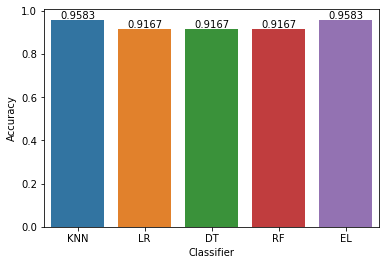

In [177]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()